### 과정 : 데이터 수집 - 데이터 시각화 - 데이터 전처리 - 모델 선택 - 모델 분석-시스템 적용

데이터 마이닝, 분석이라는 게 뭘까?
- 데이터가 어떤 특성을 가지고 있는지 확인하고, 이를 이용해서 데이터가 가지고 있는 의미를 얻어내는 것  
= 데이터 간의 상관관계를 파악한다 / 파악한 관계를 확인해서 우리가 얻고자 하는 새로운 데이터를 추출해내는 것


# 예측(prediction)
- 우리가 어떤 입력 데이터(숫자, 문장, 이미지, 음성, 영상 등)를 가지고 이후에 있을 결과를 출력하는 방법
- 전체 데이터 중 맞은 결과를 맞았다고 예측할 확률 + 틀린 결과를 틀렸다고 예측할 확률

## 예측의 예시
- 음식점의 전체 가격과, 팁을 준 요일, 성별 등을 입력하면 이번 주에 들어올 팁의 금액을 예측할 수 있다
- 부동산의 위치, 교통망, 주거환경, 건축연도 등을 입력하면 해당 부동산의 가치를 예측할 수 있다.
- 현재 바둑돌의 위치들을 주면 다음 바둑돌의 위치를 선정한다 ex) 알파고

## 예측 데이터에 사용되는 데이터의 표기
- 입력 전체 데이터 : X, 독립 변수, 특징(features) 
- 출력 전체 데이터 : Y, 종속 변수, 라벨(label), 클래스(class)
- 입력 데이터 중 데이터 1개 : x, feature, 칼럼
- 출력 데이터 중 데이터 1개 : y

## 예측 문제를 풀기 위한 방법(알고리즘 또는 규칙)
1. 규칙 기반 방법
- 어떤 입력이 들어왔을 때 어떤 출력이 나오는지를 결정하는 규칙을 '사람이 미리 결정하는 방법'
- ex) 스무고개, 수수께끼 
- ex) 귀가 뾰족하고 / 수염이 있고 / 사람보다 작은 크기 / 꼬리가 길고 / 쥐를 잘 잡으며 / 야옹하고 운다. = 고양이!

2. 학습 기반(데이터 기반) 방법
- 대량의 데이터를 컴퓨터에 입력해서, 해당 컴퓨터가 데이터 내에서 특징을 찾아, 그것을 규칙으로 만드는 방법
- 통계적인 기법이 그 시초
- 지도학습 : 입력값과 정답을 쌍으로 가지고 있는 데이터를 컴퓨터에게 입력해서, 컴퓨터가 두 데이터 간의 연결고리를 찾아내도록 하는 방법
- ex) 컴퓨터가 지도학습을 하는 방식
-> 개 사진 - '개'  / 고양이 사진 - '고양이' 이라는 이미지와 라벨 데이터를 생성한다
-> 컴퓨터에게 입력한다
-> 컴퓨터가 이미지와 라벨의 연결고리를 찾아낸다
- ex) 사람이 지도학습을 하는 방식
-> 개 사진 - '개'  / 고양이 사진 - '고양이' 이라는 이미지와 라벨 데이터를 생성한다  
(대량의 문제를 생성한다)
-> 입력한다  
(문제를 푼다)
-> 이미지와 라벨의 연결고리를 찾아낸다  
(문제를 풀고 나서 채점하고 다시 문제를 풀어보면서, 오답을 점점 줄여나간다)

### 학습 기반 방식, 지도 학습의 대표적인 기법 : 회귀분석, 분류

#### 영어 표기법
회귀분석 : regression  
분류 : classification

#### 회귀 분석 : 데이터가 숫자일때, 얻어야 되는 데이터가 숫자로 정해져있을 때, ex) 주관식 문제
#### 분류 : 데이터가 카테고리일때, ex) 객관식 문제 
-----------------------------------------------------------------------

#### 회귀분석 : 주택 가격 예측(미국 보스턴시 부동산 데이터) 

In [11]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt

boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


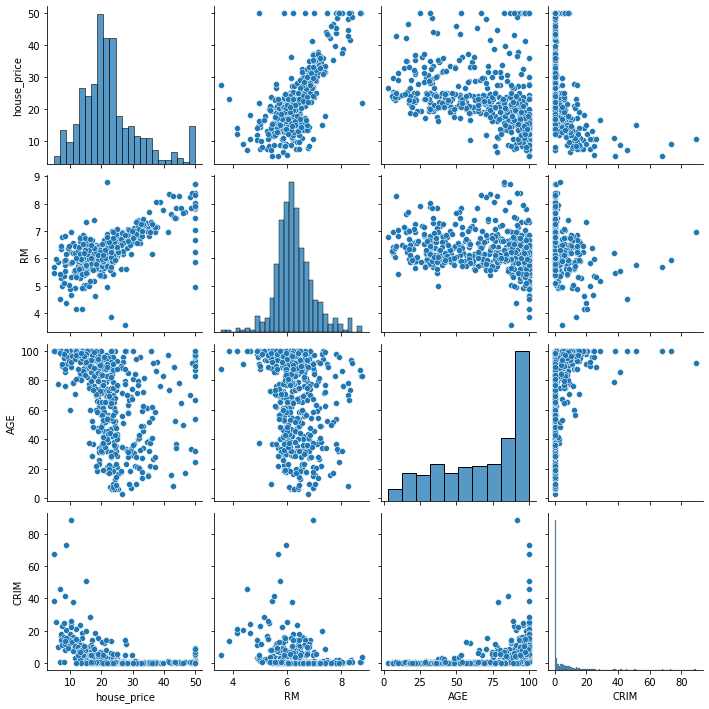

In [13]:
#데이터 시각화 - 상관분석
#독립 변수간 상관관계가 없다고 하더라도 이 데이터가 실제로 종속 변수(y)에 영향을 끼치는 안끼치지는지는 알 수 없다
df_boston['house_price'] = boston.target #집 가격
#RM : 방 갯수, AGE: 건물의 연식, CRM : 범죄율
graph = sns.pairplot(df_boston[['house_price','RM','AGE','CRIM']]) 
plt.show()

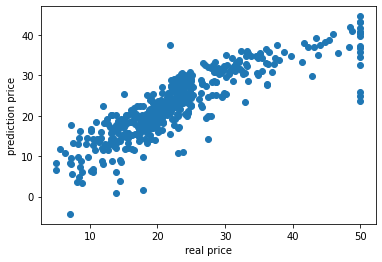

In [15]:
#회귀분석
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(boston.data, boston.target) #입력 데이터, 출력 데이터 순으로 입력
pred = model.predict(boston.data) 

#실제 정답값과 예측한 정답값을 비교해서하여 모델의 정확도를 확인
#손실 값 : 실제 정답 값-예측 정답값의 합 or 평균을 가지고 얼마나 오차가 일어났는지를 확인

plt.scatter(boston.target, pred) #X, Y 순으로 입력
plt.xlabel('real price')
plt.ylabel('prediction price')
plt.show()

In [42]:
#분류
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target = pd.Series(iris.target, dtype = 'category')
iris_target = iris_target.cat.rename_categories(iris.target_names) #카데고리의 이름을 바꿔줌
df_iris['species'] = iris_target

In [43]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


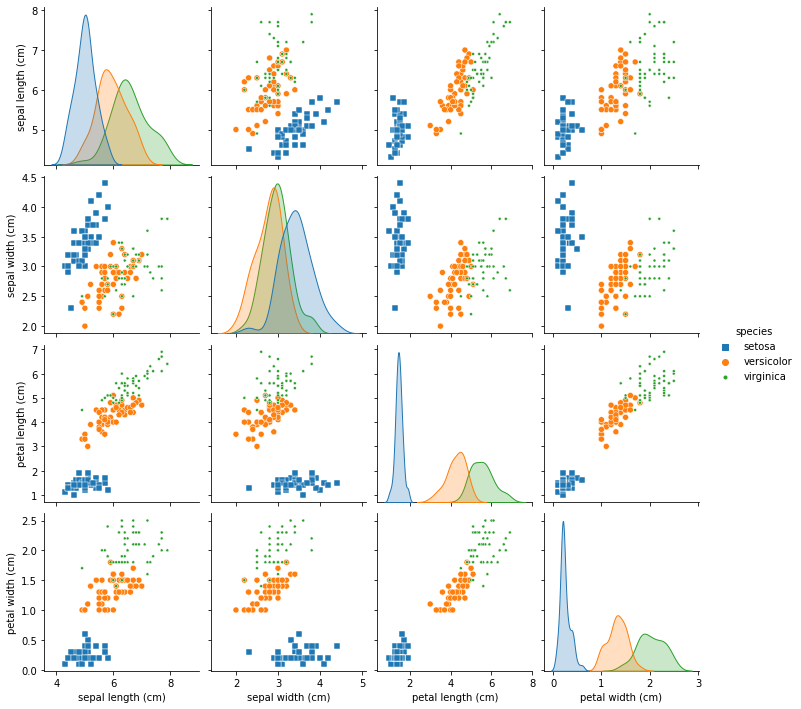

In [51]:
sns.pairplot(df_iris, hue = 'species', markers = ['s','o','.'])
plt.show()

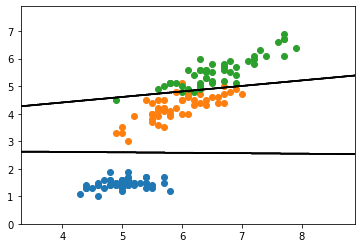

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
#SVM = 기준선과 두 데이터 간의 거리가 최대가 되도록하는 기준선을 찾는 알고리즘

feature = [0,2]
X = iris.data[:, feature] #[:, [1,2]]
y = iris.target

model = SVC(kernel='linear', random_state= 0)
model.fit(X,y)

#시각화
XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1

XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                    np.linspace(YY_min, YY_max,1000))
ZZ = model.predict(np.c_[XX.ravel(),YY.ravel()]).reshape(XX.shape)

plt.scatter(X[y == 0, 0], X[y == 0, 1], label = iris.target_names[0])
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = iris.target_names[1])
plt.scatter(X[y == 2, 0], X[y == 2, 1], label = iris.target_names[2])
plt.contour(XX,YY,ZZ, colors = 'k')

plt.show()

### 비지도 학습(군집)
#### 클러스터링(clustering)
- 데이터들을 유사한 데이터들끼리 같은 그룹으로 분류를 해놓는 것
- 데이터들 간 관계에서 사람이 몰랐던 특정한 규칙을 컴퓨터가 찾아낸다라고도 볼 수 있음
- 컴퓨터가 나누어놓은 결과값을 사람이 해석해야한다

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


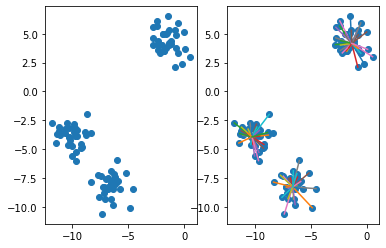

In [66]:
#클러스터링을 하면 어떻게 되는가?
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

X, _ = make_blobs(n_features= 2, centers= 3, random_state=1)
model = AffinityPropagation().fit(X)

plt.subplot(121)
plt.scatter(X[:,0], X[:,1])
plt.subplot(122)
plt.scatter(X[:,0], X[:,1])

for i in range(3):
    cluster_center = X[model.cluster_centers_indices_[i]]
    for x in X[model.labels_ == i]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]])

plt.show()